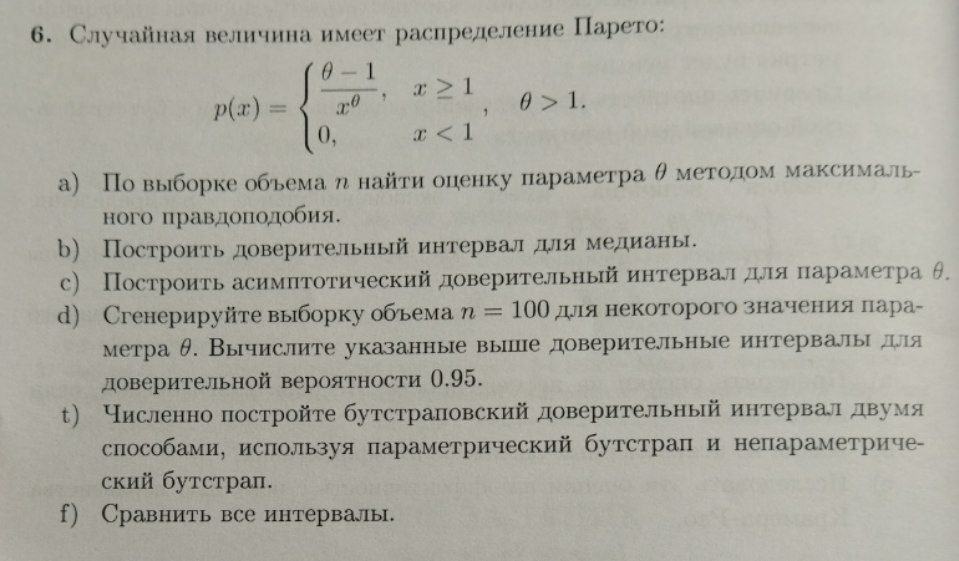

In [1]:
from IPython.display import Image

Image("images/photo_5350494331657645199_y.jpg")